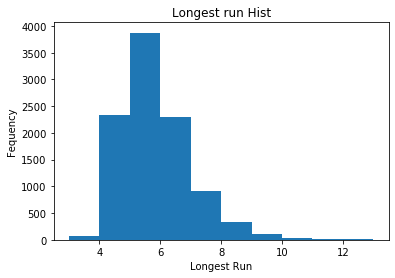

5.3354


In [27]:
import random, pylab

# You are given this function
def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

# You are given this class
class Die(object):
    def __init__(self, valList):
        """ valList is not empty """
        self.possibleVals = valList[:]
    def roll(self):
        return random.choice(self.possibleVals)

# Implement this -- Coding Part 1 of 2
def makeHistogram(values, numBins, xLabel, yLabel, title=None):
    """
      - values, a sequence of numbers
      - numBins, a positive int
      - xLabel, yLabel, title, are strings
      - Produces a histogram of values with numBins bins and the indicated labels
        for the x and y axis
      - If title is provided by caller, puts that title on the figure and otherwise
        does not title the figure
    """
    pylab.hist(values,bins=numBins)
    if title is not None:
        pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.show()
    
# makeHistogram([1], 4, "Aa", "Bb")                  
# Implement this -- Coding Part 2 of 2
def getAverage(die, numRolls, numTrials):
    """
      - die, a Die
      - numRolls, numTrials, are positive ints
      - Calculates the expected mean value of the longest run of a number
        over numTrials runs of numRolls rolls.
      - Calls makeHistogram to produce a histogram of the longest runs for all
        the trials. There should be 10 bins in the histogram
      - Choose appropriate labels for the x and y axes.
      - Returns the mean calculated
    """
    longestrun = []
    d = die
    pv = sorted(list(set(d.possibleVals)))

    for i in range(numTrials):
        pvlr = {}
        val = []
        for i in range(numRolls):
            val.append(d.roll())

        for i in pv:
            pvlr[i] = 1
            maxv = 1
            for ind, v in enumerate(val):
                if ind == 0:
                    pass
                elif v == val[ind-1]:
                    maxv += 1
                    if pvlr[i] < maxv:
                        pvlr[i] = maxv
                else:
                    maxv = 1

        longestrun.append(max(pvlr.values()))

    makeHistogram(longestrun, 10, 'Longest Run', 'Fequency', 'Longest run Hist')
    mlr, _ = getMeanAndStd(longestrun)
    return mlr
    
# One test case
print(getAverage(Die([1,2,3,4,5,6,6,6,7]), 500, 10000))